<a href="https://colab.research.google.com/github/eunzzae/PJT_C.lab/blob/main/240714_%EC%BB%A4%EB%84%A5%EC%B8%A0%EB%9E%A9_%EC%9C%A0%EC%82%AC%EB%8F%84%EB%B6%84%EC%84%9D(%EA%B3%A0%EA%B0%9D)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns

font_list = [font.name for font in fm.fontManager.ttflist]
font_list.sort()
font_list
plt.rcParams['font.family'] = 'NanumGothic'
# plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import silhouette_visualizer
from sklearn.preprocessing import RobustScaler

from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/yellowbrick/style/colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/usr/local/lib/python3.10/dist-packages/yellowbrick/style/rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/data/connects_lab/')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Colab Notebooks/data/connects_lab'

In [ ]:
base_path = '/content/drive/MyDrive/Colab Notebooks/data/connects_lab/'

# Data read
import pandas as pd
pd.set_option('display.max_columns', 500)
bath = '/content/drive/MyDrive/Colab Notebooks/data/connects_lab/'
cus_df = pd.read_excel(base_path+'Customer_Data_ori.xlsx')
map_df = pd.read_csv(base_path+'course_data_0124.csv')

cus_df.head()

,Name,Age,Child_Age_Months,Number_of_Children,Gender,Child_1_Gender,Child_2_Gender,Child_3_Gender,Parenting_Concerns,Parenting_Stress_Level,Parenting_Letter,Child_1_Age_Months,Child_2_Age_Months,Child_3_Age_Months
0,조서연,30,3,1,Female,Male,NaN,NaN,"['건강', '감정표현', '양육법']",5,"육아에 대한 고민을 나누고 싶어 글을 씁니다, 저는 30세의 엄마입니다. 양육의 어...",3,NaN,NaN
1,최하은,34,42,1,Female,Female,NaN,NaN,"['수면', '부모역할', '양육 스트레스']",5,"안녕하세요, 저는 34세의 엄마입니다. 지치고 막막함을 느끼고 있습니다. 제 육아 ...",42,NaN,NaN
2,이현우,34,27,1,Male,Female,NaN,NaN,"['발달', '상호작용', '양육 스트레스']",4,"안녕하세요, 저는 34세의 아빠입니다. 이러한 상황이 저를 매우 우울하게 만듭니다....",27,NaN,NaN
3,장예은,36,47,2,Female,Female,Female,NaN,"['양육 스트레스', '수면', '감정표현']",4,이 글을 통해 도움을 구하고자 합니다. 저는 36세의 엄마입니다. 양육의 어려움에 ...,67,47.0,NaN
4,최예은,32,22,3,Female,Female,Female,Male,"['관계', '감정표현', '부모역할']",1,"안녕하세요, 저는 32세의 엄마입니다. 양육의 어려움에 직면하고 있습니다. 제 육아...",120,72.0,22.0


In [ ]:
map_df.head()

,일련번호,주제 구분,내용구분,시기,시기_2,코스 명,3T,NVC,육아정보,양육자Only,추천태그,관련 육아고민,세부내용,기간(week),Score_3T,Score_NVC,Score_육아정보,Total_Score
0,1,Basic,필수,가입 직후/all,"[0, 48]",첫걸음,4,4,2,NaN,"입문,기초,필수","육아관, 관계, 발달, 상호작용",(3T/NVC기초) + 육아관,2,3,3,4,10
1,2,Basic,발달,~24m,"[0, 24]",생애초기 (intro),5,3,2,NaN,"생애초기, 기초,언어자극,상호작용","육아관, 육아방법, 상호작용, 관계, 발달, 부모역할, 수면","언어자극과 두뇌발달, 아이들 발화 이전의 상호작용 방법",1,3,5,7,15
2,3,Basic,발달,22~27m,"[22, 27]",두돌,4,4,2,NaN,"24개월, 두돌, 두살, 발달사항, 싫어, 왜요","육아관, 육아방법, 상호작용, 발달, 감정표현, 부모역할",두돌 발달사항 체크와 해당기간 상호작용 방법,1,3,5,6,14
3,4,Basic,발달,34~39m,"[34, 39]",세돌,2,6,2,NaN,"36개월, 세돌, 세살, 발달사항, 미운네살, 싫어","육아관, 육아방법, 상호작용, 발달, 감정표현, 부모역할, 훈육",세돌 발달사항 체크와 해당기간 상호작용 방법,1,3,6,7,16
4,5,Basic,발달,45m~,"[45, 48]",네돌 (outro),2,6,2,NaN,"48개월, 네돌, 발달사항, 졸업","육아관, 육아방법, 상호작용, 발달, 감정표현, 부모역할, 훈육",네돌 발달사항 체크와 해당기간 상호작용 방법,1,3,6,7,16


## Session 0

### Data 확인
---

In [ ]:
# Data shape
# cus_df (50000rows, 14cols)
# map_df (32rows, 18col)
print(f'cus_df shape : {cus_df.shape}')
print(f'map_df shape : {map_df.shape}')

cus_df shape : (50000, 14)
map_df shape : (32, 18)


In [ ]:
# Data type
cus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    50000 non-null  object 
 1   Age                     50000 non-null  int64  
 2   Child_Age_Months        50000 non-null  int64  
 3   Number_of_Children      50000 non-null  int64  
 4   Gender                  50000 non-null  object 
 5   Child_1_Gender          50000 non-null  object 
 6   Child_2_Gender          14957 non-null  object 
 7   Child_3_Gender          2474 non-null   object 
 8   Parenting_Concerns      50000 non-null  object 
 9   Parenting_Stress_Level  50000 non-null  int64  
 10  Parenting_Letter        50000 non-null  object 
 11  Child_1_Age_Months      50000 non-null  int64  
 12  Child_2_Age_Months      14957 non-null  float64
 13  Child_3_Age_Months      2474 non-null   float64
dtypes: float64(2), int64(5), object(7)
mem

In [ ]:
map_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   일련번호         32 non-null     int64 
 1   주제    구분     32 non-null     object
 2   내용구분         32 non-null     object
 3   시기           32 non-null     object
 4   시기_2         32 non-null     object
 5   코스 명         32 non-null     object
 6   3T           32 non-null     int64 
 7   NVC          32 non-null     int64 
 8   육아정보         32 non-null     int64 
 9   양육자Only      6 non-null      object
 10  추천태그         32 non-null     object
 11  관련 육아고민      32 non-null     object
 12  세부내용         15 non-null     object
 13  기간(week)     32 non-null     int64 
 14  Score_3T     32 non-null     int64 
 15  Score_NVC    32 non-null     int64 
 16  Score_육아정보   32 non-null     int64 
 17  Total_Score  32 non-null     int64 
dtypes: int64(9), object(9)
memory usage: 4.6+ KB


In [ ]:
# Null 확인
cus_df.isnull().sum()

Name                          0
Age                           0
Child_Age_Months              0
Number_of_Children            0
Gender                        0
Child_1_Gender                0
Child_2_Gender            35043
Child_3_Gender            47526
Parenting_Concerns            0
Parenting_Stress_Level        0
Parenting_Letter              0
Child_1_Age_Months            0
Child_2_Age_Months        35043
Child_3_Age_Months        47526
dtype: int64

In [ ]:
# Outlier 확인
cus_df.describe()

,Age,Child_Age_Months,Number_of_Children,Parenting_Stress_Level,Child_1_Age_Months,Child_2_Age_Months,Child_3_Age_Months
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,14957.000000,2474.000000
mean,34.523620,30.097020,1.348620,3.800700,44.299660,35.366116,30.213015
std,4.800436,17.614812,0.571008,1.120859,30.336037,22.159493,17.760376
min,25.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,31.000000,15.000000,1.000000,3.000000,21.000000,18.000000,15.000000
50%,34.000000,30.000000,1.000000,4.000000,40.000000,35.000000,30.000000
75%,38.000000,45.000000,2.000000,5.000000,58.000000,50.000000,46.000000
max,45.000000,60.000000,3.000000,5.000000,120.000000,120.000000,60.000000


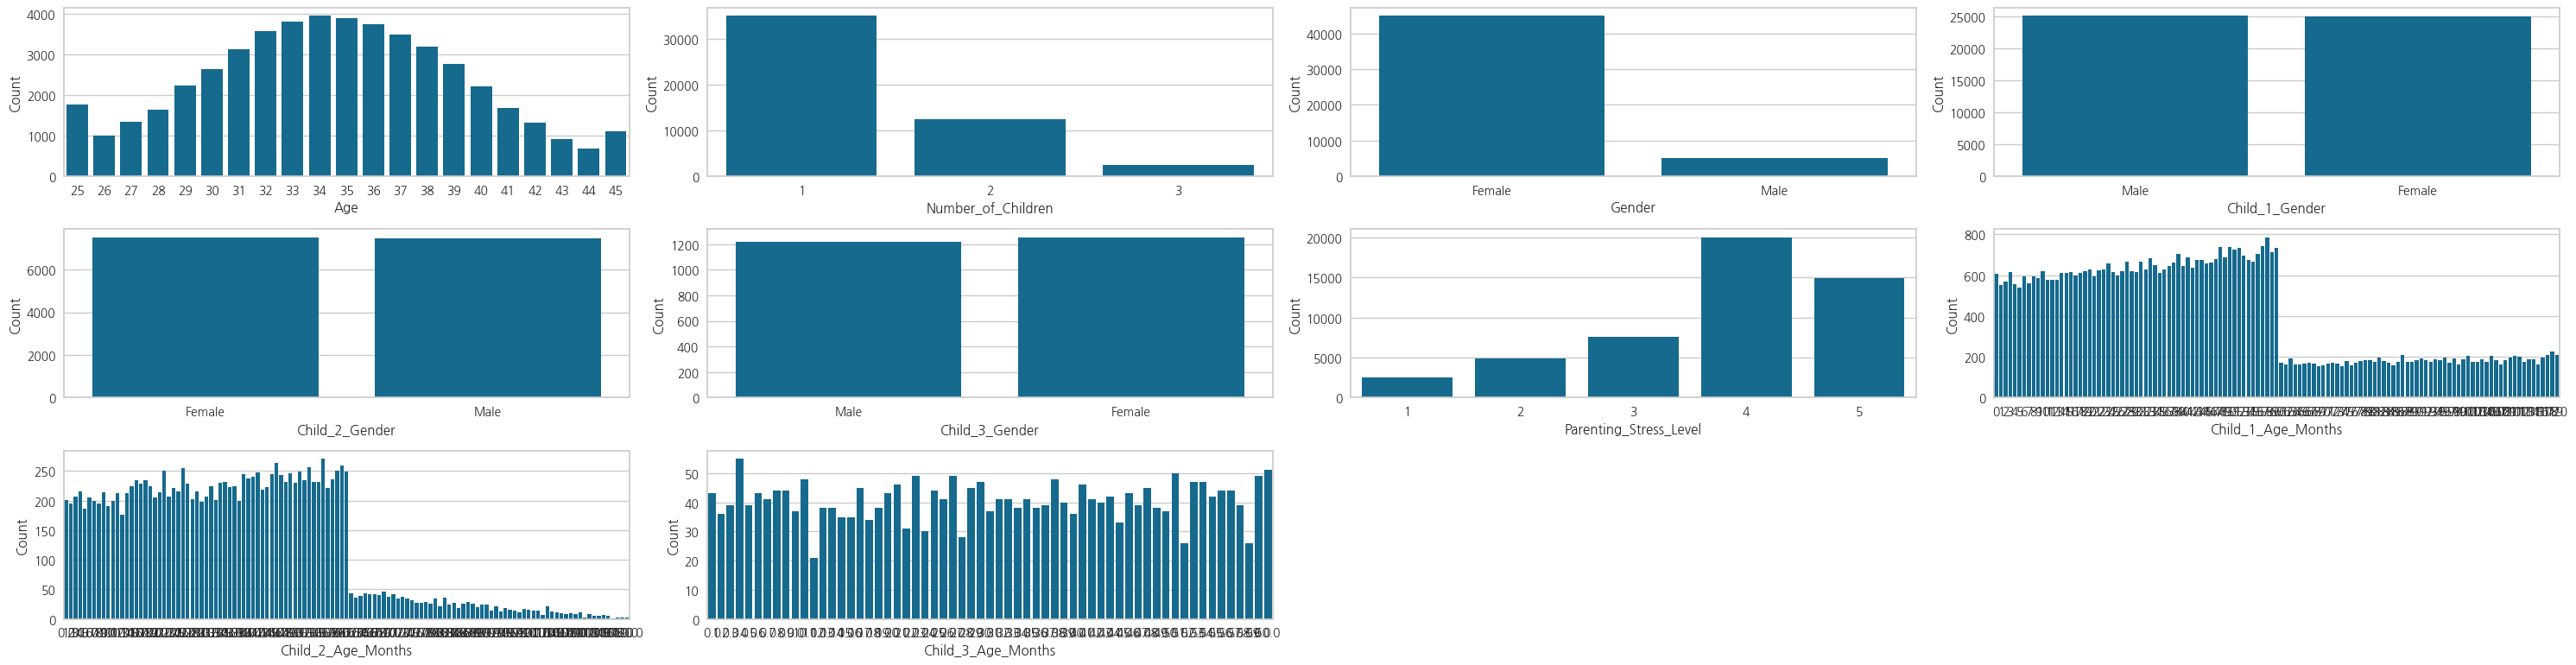

In [ ]:
cols_to_visualize = ['Age', 'Number_of_Children','Gender','Child_1_Gender',	'Child_2_Gender',	'Child_3_Gender',	'Parenting_Stress_Level','Child_1_Age_Months',	'Child_2_Age_Months',	'Child_3_Age_Months']

plt.figure(figsize=(30,10))
for i, col in enumerate(cols_to_visualize):
    plt.subplot(4,4,i+1)
    sns.countplot(x=col, data=cus_df)
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 데이터 전처리
---

#### 고객id 컬럼 생성

In [ ]:
import random
import string

# 무작위 고객 ID 생성 함수
def generate_random_id(length=8, randomstate=42):
    letters_and_digits = string.ascii_letters + string.digits
    return ''.join(random.choice(letters_and_digits) for i in range(length))

# 고객 id 컬럼 생성
cus_df['고객id'] = [generate_random_id() for _ in range(len(cus_df))]

# 고객id 컬럼을 Name 컬럼 앞에 위치시키기
cols = cus_df.columns.tolist()
cols.insert(cols.index('Name'), cols.pop(cols.index('고객id')))
cus_df = cus_df[cols]

#### 결측값 처리

In [ ]:
# NaN을 0으로 replace
cus_df.fillna(0, inplace=True)

#### 고민 텍스트

In [ ]:
!pip install konlpy

In [ ]:
import konlpy
from konlpy.tag import Okt
import re
from collections import Counter
from wordcloud import WordCloud

##### 텍스트 전처리

In [ ]:
okt = Okt()

In [ ]:
def preprocess_text(text):
    # 대괄호로 묶인 내용 제거
    text = re.sub(r'\[.*?\]', '', text)
    # 특수문자 제거
    text = re.sub(r'\W+', ' ', text)
    # 불용어 제거
    stopwords = ['의', '세', '저', '제', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']
    text = ' '.join(word for word in text.split() if word not in stopwords)
    return text

# 'Parenting_Letter' 열에 함수 적용
cus_df['Parenting_Letter'] = cus_df['Parenting_Letter'].apply(preprocess_text)

# 형태소 분석기를 사용하여 명사 추출
cus_df['Nouns'] = cus_df['Parenting_Letter'].apply(lambda x: okt.nouns(x))

In [ ]:
def preprocess_text(word_list):
    # 불용어 리스트
    stopwords = ['의', '세', '저', '제', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']
    # 불용어 제거
    return [word for word in word_list if word not in stopwords]

# 'Nouns' 열에 함수 적용
cus_df['Nouns'] = cus_df['Nouns'].apply(preprocess_text)

# 모든 명사를 하나의 리스트로 합침
all_nouns = [noun for sublist in cus_df['Nouns'] for noun in sublist]

##### 단어 빈도

In [ ]:
# 단어 빈도 계산
word_counts = Counter(all_nouns)

# 가장 많이 등장한 단어 20개 출력
print(word_counts.most_common(100))

[('아이', 82017), ('육아', 66718), ('고민', 66718), ('엄마', 44913), ('방법', 41101), ('글', 33429), ('도움', 33297), ('어려움', 30337), ('양육', 30280), ('개선', 27393), ('알', 27334), ('자주', 27330), ('발달', 27260), ('직면', 16794), ('귀하', 16748), ('경험', 16748), ('공유', 16748), ('대한', 16718), ('통해', 16711), ('구', 16711), ('조언', 16666), ('구합', 16666), ('니', 16666), ('상황', 16615), ('매우', 16615), ('만듭니', 16615), ('주시', 16586), ('관계', 13767), ('더', 13767), ('나은', 13767), ('의사소통', 13767), ('편식', 13747), ('식단', 13747), ('거부', 13747), ('영양', 13747), ('상태', 13747), ('걱정', 13747), ('면역', 13704), ('건강', 13704), ('관리', 13704), ('단계', 13630), ('평균', 13630), ('것', 13630), ('밤', 13626), ('낮잠', 13626), ('거의', 13626), ('자지', 13626), ('수면', 13626), ('패턴', 13626), ('감정', 13543), ('조절', 13543), ('지원', 13543), ('연속', 13486), ('책임', 13486), ('스트레스', 13486), ('자신', 13486), ('시간', 13486), ('아빠', 5087)]


##### 단어 시각화

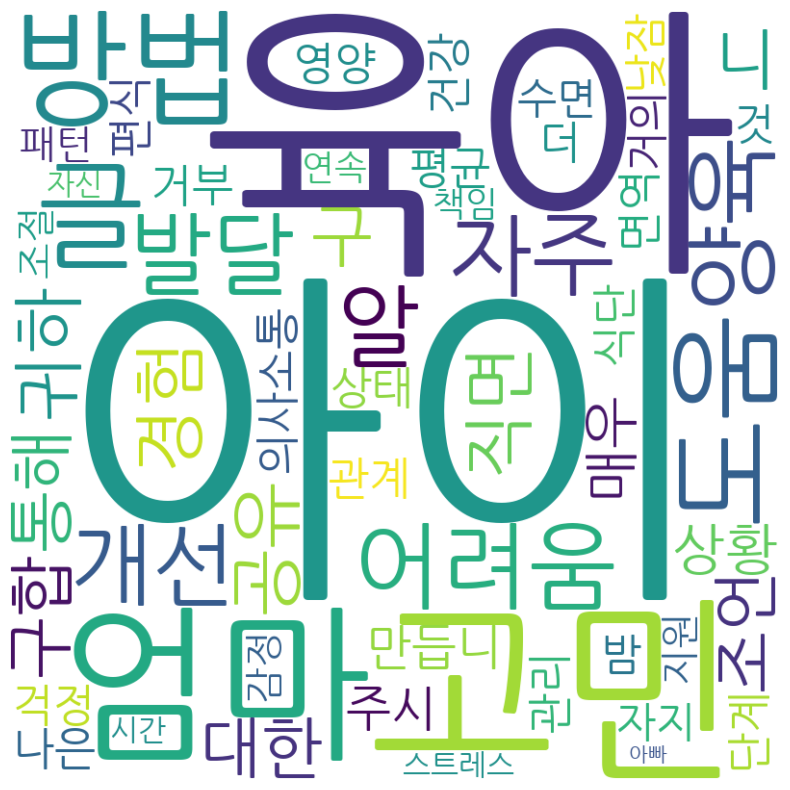

In [ ]:
# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='NanumGothic.ttf',  # 한글 폰트 경로
    width=800,
    height=800,
    background_color='white'
).generate_from_frequencies(word_counts)

# 워드클라우드 시각화
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### 데이터 분포

단어의 최대 길이 :  4
단어의 평균 길이 :  1.9715854485123774


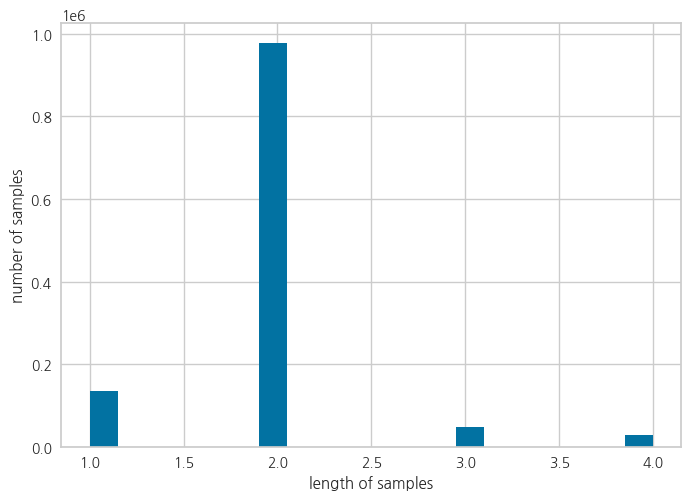

In [ ]:
print('단어의 최대 길이 : ', max(len(concern) for concern in all_nouns))
print('단어의 평균 길이 : ', sum(map(len, all_nouns))/len(all_nouns))
plt.hist([len(concern) for concern in all_nouns], bins=20)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## Session 1

### 단어 임베딩
---

#### TFIDF

In [ ]:
# Convert list of nouns to a string
cus_df['Nouns'] = cus_df['Nouns'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(max_features=30000)  # 상위 1000개의 단어만 사용
tfidf_X = tfidf_vectorizer.fit_transform(cus_df['Nouns'])

# TF-IDF 데이터프레임 생성
tfidf_df = pd.DataFrame(tfidf_X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# TF-IDF 데이터프레임 확인
print('TFIDFVectorizer Shape:', tfidf_X.shape)

TFIDFVectorizer Shape: (50000, 51)


In [ ]:
# 중요 단어 확인 (첫 번째 문서 기준)
first_doc_tfidf = tfidf_df.iloc[0]
important_words = first_doc_tfidf.sort_values(ascending=False).head(30)
print("First document's important words:\n", important_words)

First document's important words:
 어려움     0.367893
감정      0.254976
지원      0.254976
조절      0.254976
면역      0.253669
건강      0.253669
관리      0.253669
아이      0.234687
조언      0.232035
구합      0.232035
대한      0.231690
직면      0.231189
고민      0.221132
육아      0.221132
자주      0.188945
양육      0.183878
방법      0.156165
엄마      0.122429
주시      0.000000
편식      0.000000
연속      0.000000
영양      0.000000
패턴      0.000000
통해      0.000000
의사소통    0.000000
책임      0.000000
자지      0.000000
아빠      0.000000
자신      0.000000
수면      0.000000
Name: 0, dtype: float64


#### Count Vectorizer

In [ ]:
count_vectorizer = CountVectorizer(max_df=0.95, max_features=30000, min_df=2,  ngram_range=(1,2))
count_X = count_vectorizer.fit_transform(cus_df['Nouns'])
print('CountVectorizer Shape:', count_X.shape)

CountVectorizer Shape: (50000, 137)


### LDA(주제 학습)
---

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# LDA 모델 학습
n_topics = 11
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)  # 11개의 주제 추출
lda.fit(count_X)

LatentDirichletAllocation(n_components=11, random_state=42)

In [ ]:
LatentDirichletAllocation(n_components=8, random_state=0)

LatentDirichletAllocation(n_components=8, random_state=0)

In [ ]:
print(lda.components_.shape)
lda.components_

(11, 137)


array([[9.09103392e-02, 9.09103392e-02, 1.30401324e+03, ...,
        9.09100896e-02, 9.09101572e-02, 9.09101572e-02],
       [9.09112497e-02, 9.09112497e-02, 6.78958127e-01, ...,
        9.76958457e-02, 9.09113204e-02, 9.09113204e-02],
       [4.76970762e+00, 4.76987920e+00, 2.56358150e+00, ...,
        9.09119649e-02, 2.60068894e-01, 2.53684361e-01],
       ...,
       [1.92347985e-01, 1.92530274e-01, 9.93783208e-01, ...,
        1.37408300e+04, 9.09113007e-02, 9.09113007e-02],
       [3.17396003e-01, 3.17441233e-01, 3.00960981e+03, ...,
        9.09114275e-02, 9.09114978e-02, 9.09114978e-02],
       [9.09114430e-02, 9.09114430e-02, 1.23365093e+04, ...,
        9.89466144e-02, 9.09128668e-02, 9.09132616e-02]])

{'감정표현': 1, '건강': 2, '관계': 3, '발달': 4, '부모역할': 5, '상호작용': 6, '수면': 7, '식습관': 8, '양육 스트레스': 9, '양육법': 10, '학습지도': 11}

In [ ]:
def display_topic_words(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('\nTopic #',topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]

        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' + '.join([str(feature_names[i])+'*'+str(round(topic[i],1)) for i in top_indexes])
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names_out()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topic_words(lda, feature_names, 15)


Topic # 0
양육*1619.1 + 개선*1304.0 + 연속*1300.2 + 스트레스 자신*1300.2 + 연속 양육*1300.2 + 자신*1300.2 + 양육 책임*1300.2 + 시간*1300.2 + 자신 시간*1300.2 + 스트레스*1300.2 + 책임 스트레스*1300.2 + 책임*1300.2 + 거의 자지*1299.6 + 자지 수면*1299.6 + 패턴*1299.6

Topic # 1
자주 면역*13677.0 + 관리 방법*13677.0 + 면역 건강*13677.0 + 면역*13677.0 + 관리*13677.0 + 건강*13677.0 + 건강 관리*13677.0 + 아이 자주*13562.0 + 자주*13561.9 + 방법*13281.3 + 아이*12145.5 + 고민 아이*5871.6 + 방법 아이*5339.9 + 엄마*4584.5 + 도움*3818.6

Topic # 2
상황*16469.2 + 매우*16469.0 + 상황 매우*16468.9 + 매우 만듭니*16468.9 + 만듭니*16468.9 + 만듭니 육아*16468.8 + 엄마 상황*14766.1 + 엄마*4608.2 + 아이*3627.4 + 도움*3360.7 + 고민 아이*3175.8 + 경험*2637.1 + 귀하 경험*2636.3 + 공유*2636.0 + 경험 공유*2636.0

Topic # 3
나은 의사소통*10763.7 + 개선 나은*10763.7 + 아이 관계*10763.7 + 의사소통 방법*10763.7 + 관계 개선*10763.7 + 의사소통*10763.7 + 나은*10763.7 + 관계*10763.7 + 개선*10732.7 + 방법*10504.3 + 아이*9971.3 + 고민 아이*4782.2 + 방법 아이*4197.9 + 엄마*4162.2 + 엄마 육아*2518.2

Topic # 4
연속*12183.2 + 스트레스 자신*12183.2 + 연속 양육*12183.2 + 자신*12183.2 + 양육 책임*12183.2 + 시간*12183.2 + 자신 시간*12183.2 

In [ ]:
# 주제별 가장 연관도가 높은 단어를 데이터프레임으로 만드는 함수
def get_topic_words_dataframe(model, feature_names, no_top_words):
    topic_words = []
    for topic_index, topic in enumerate(model.components_):
        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]

        # top_indexes 대상인 index별로 feature_names에 해당하는 word feature 추출
        words = [feature_names[i] for i in top_indexes]
        topic_words.append(words)

    # 데이터프레임 생성
    topic_words_df = pd.DataFrame(topic_words, index=[f'Topic {i}' for i in range(model.n_components)])
    topic_words_df.columns = [f'Word {i+1}' for i in range(no_top_words)]

    return topic_words_df

# CountVectorizer 객체 내의 전체 단어 명칭 추출
feature_names = count_vectorizer.get_feature_names_out()

# Topic별 가장 연관도가 높은 단어를 15개만 추출해서 데이터프레임으로 생성
topic_words_df = get_topic_words_dataframe(lda, feature_names, 15)

# 결과 출력
print(topic_words_df)

           Word 1   Word 2 Word 3   Word 4 Word 5  Word 6  Word 7  Word 8  \
Topic 0        양육       개선     연속  스트레스 자신  연속 양육      자신   양육 책임      시간   
Topic 1     자주 면역    관리 방법  면역 건강       면역     관리      건강   건강 관리   아이 자주   
Topic 2        상황       매우  상황 매우   매우 만듭니    만듭니  만듭니 육아   엄마 상황      엄마   
Topic 3   나은 의사소통    개선 나은  아이 관계  의사소통 방법  관계 개선    의사소통      나은      관계   
Topic 4        연속  스트레스 자신  연속 양육       자신  양육 책임      시간   자신 시간    스트레스   
Topic 5        발달    발달 방법  평균 발달    발달 단계     단계   단계 평균      평균   아이 발달   
Topic 6        직면   어려움 직면  직면 육아   양육 어려움     양육     어려움   엄마 양육      경험   
Topic 7       어려움   조절 어려움     조절       감정  감정 조절      지원  어려움 지원   아이 감정   
Topic 8     아이 편식    식단 거부     거부    편식 식단     상태      걱정   영양 상태      편식   
Topic 9        아이       방법    어려움       개선     직면  어려움 직면   직면 육아  양육 어려움   
Topic 10       개선    거의 자지  자지 수면       패턴  낮잠 거의      자지      수면      거의   

           Word 9  Word 10  Word 11 Word 12 Word 13  Word 14 Word 15  
Topi

In [ ]:
doc_topics = lda.transform(count_X)
print(doc_topics.shape)
print(doc_topics[:3])

(50000, 11)
[[0.00233111 0.4131255  0.00233108 0.00233111 0.00233108 0.00233112
  0.21306981 0.35515579 0.00233108 0.00233122 0.00233109]
 [0.97402445 0.00259756 0.00259747 0.00259753 0.00259771 0.00259751
  0.00259748 0.00259754 0.0025975  0.00259752 0.00259774]
 [0.00233113 0.00233106 0.26647727 0.00233111 0.37865639 0.3362176
  0.00233118 0.00233108 0.00233106 0.00233106 0.00233106]]


In [ ]:
def get_nouns_list(nouns_column):
    nouns_list = []

    for item in nouns_column:
        # 각 항목이 문자열인지 확인하고, 그렇지 않으면 문자열로 변환
        if isinstance(item, list):
            # 리스트를 문자열로 결합
            nouns_temp = ' '.join(item)
        else:
            nouns_temp = str(item)

        nouns_list.append(nouns_temp)

    return nouns_list

# 'Nouns' 열에서 명사 리스트를 추출
nouns_list = get_nouns_list(cus_df['Nouns'])
print("명사 리스트 개수:", len(nouns_list), "명사 리스트 10개만:", nouns_list[:5])


명사 리스트 개수: 50000 명사 리스트 10개만: ['육아 대한 고민 글 엄마 양육 어려움 직면 육아 고민 아이 자주 면역 건강 관리 방법 알 아이 감정 조절 어려움 지원 조언 구합 니', '엄마 육아 고민 아이 밤 자주 낮잠 거의 자지 수면 패턴 개선 연속 양육 책임 스트레스 자신 시간 도움 주시', '아빠 상황 매우 만듭니 육아 고민 아이 발달 단계 평균 것 발달 방법 알 연속 양육 책임 스트레스 자신 시간 귀하 경험 공유', '글 통해 도움 구 엄마 양육 어려움 직면 육아 고민 연속 양육 책임 스트레스 자신 시간 아이 밤 자주 낮잠 거의 자지 수면 패턴 개선 아이 감정 조절 어려움 지원 도움 주시', '엄마 양육 어려움 직면 육아 고민 아이 관계 개선 더 나은 의사소통 방법 아이 감정 조절 어려움 지원 도움 주시']


In [ ]:
# 'Name' 열 추가하여 데이터프레임 생성
topic_names = [str(i) for i in range(lda.n_components)]
merge_df = pd.DataFrame(data=doc_topics, columns=topic_names, index=cus_df['고객id']).reset_index().rename(columns={'index': '고객id'})
merge_df['Nouns'] = nouns_list

merge_df.head(20)

,고객id,0,1,2,3,4,5,6,7,8,9,10,Nouns
0,Kkv35HMb,0.002331,0.413126,0.002331,0.002331,0.002331,0.002331,0.213070,0.355156,0.002331,0.002331,0.002331,육아 대한 고민 글 엄마 양육 어려움 직면 육아 고민 아이 자주 면역 건강 관리 방...
1,5dV7Owcf,0.974024,0.002598,0.002597,0.002598,0.002598,0.002598,0.002597,0.002598,0.002597,0.002598,0.002598,엄마 육아 고민 아이 밤 자주 낮잠 거의 자지 수면 패턴 개선 연속 양육 책임 스트...
2,b82apY4i,0.002331,0.002331,0.266477,0.002331,0.378656,0.336218,0.002331,0.002331,0.002331,0.002331,0.002331,아빠 상황 매우 만듭니 육아 고민 아이 발달 단계 평균 것 발달 방법 알 연속 양육...
3,ugaxjkrS,0.001653,0.001653,0.001653,0.001653,0.286192,0.001653,0.144590,0.223812,0.001653,0.001653,0.333835,글 통해 도움 구 엄마 양육 어려움 직면 육아 고민 연속 양육 책임 스트레스 자신 ...
4,mYYC5cg5,0.002597,0.002598,0.002597,0.002598,0.002597,0.002598,0.002598,0.334760,0.002597,0.641862,0.002597,엄마 양육 어려움 직면 육아 고민 아이 관계 개선 더 나은 의사소통 방법 아이 감정...
5,UX64ChUX,0.002331,0.401806,0.002331,0.002331,0.002331,0.002331,0.219793,0.359752,0.002331,0.002331,0.002331,글 통해 도움 구 엄마 양육 어려움 직면 육아 고민 아이 감정 조절 어려움 지원 아...
6,aQD71399,0.002114,0.002114,0.002114,0.338509,0.363497,0.002114,0.281079,0.002114,0.002114,0.002114,0.002114,글 통해 도움 구 엄마 양육 어려움 직면 육아 고민 아이 관계 개선 더 나은 의사소...
7,ti4SaGLa,0.003135,0.003135,0.385785,0.003135,0.003135,0.003135,0.003135,0.003135,0.586001,0.003135,0.003135,아빠 상황 매우 만듭니 육아 고민 아이 편식 식단 거부 영양 상태 걱정 귀하 경험 공유
8,Zb16Z3gw,0.002114,0.002114,0.002114,0.365865,0.002114,0.340575,0.276646,0.002114,0.002114,0.002114,0.002114,글 통해 도움 구 엄마 양육 어려움 직면 육아 고민 아이 발달 단계 평균 것 발달 ...
9,rjR66yFf,0.003135,0.003135,0.386446,0.585339,0.003135,0.003135,0.003135,0.003135,0.003135,0.003135,0.003135,육아 대한 고민 글 엄마 상황 매우 만듭니 육아 고민 아이 관계 개선 더 나은 의사...


In [ ]:
# 각 문서에 대해 가장 점수가 높은 세 개의 주제를 찾는 함수
def top_two_topics(row):
    sorted_topics = row[topic_names].sort_values(ascending=False)
    return pd.Series(sorted_topics.index[:3]) # 상위 3개 주제

# 'cus_df'에 가장 점수가 높은 세 개의 주제 추가
merge_df[['Topic 1', 'Topic 2', 'Topic 3']] = merge_df.apply(top_two_topics, axis=1)

In [ ]:
# cus_df, doc_topic_df를 고객id 기준으로 merge
temp_df = pd.merge(cus_df, merge_df[['고객id','Topic 1', 'Topic 2', 'Topic 3']], on='고객id')

In [ ]:
temp_df['Topic 1'] = temp_df['Topic 1'].astype(int)
temp_df['Topic 2'] = temp_df['Topic 2'].astype(int)
temp_df['Topic 3'] = temp_df['Topic 3'].astype(int)

In [ ]:
temp_df

,고객id,Name,Age,Child_Age_Months,Number_of_Children,Gender,Child_1_Gender,Child_2_Gender,Child_3_Gender,Parenting_Concerns,Parenting_Stress_Level,Parenting_Letter,Child_1_Age_Months,Child_2_Age_Months,Child_3_Age_Months,Nouns,Topic 1,Topic 2,Topic 3
0,Kkv35HMb,조서연,30,3,1,Female,Male,0,0,"['건강', '감정표현', '양육법']",5,육아에 대한 고민을 나누고 싶어 글을 씁니다 저는 30세의 엄마입니다 양육의 어려움...,3,0.0,0.0,육아 대한 고민 글 엄마 양육 어려움 직면 육아 고민 아이 자주 면역 건강 관리 방...,1,7,6
1,5dV7Owcf,최하은,34,42,1,Female,Female,0,0,"['수면', '부모역할', '양육 스트레스']",5,안녕하세요 저는 34세의 엄마입니다 지치고 막막함을 느끼고 있습니다 육아 고민은 아...,42,0.0,0.0,엄마 육아 고민 아이 밤 자주 낮잠 거의 자지 수면 패턴 개선 연속 양육 책임 스트...,0,10,4
2,b82apY4i,이현우,34,27,1,Male,Female,0,0,"['발달', '상호작용', '양육 스트레스']",4,안녕하세요 저는 34세의 아빠입니다 이러한 상황이 저를 매우 우울하게 만듭니다 육아...,27,0.0,0.0,아빠 상황 매우 만듭니 육아 고민 아이 발달 단계 평균 것 발달 방법 알 연속 양육...,4,5,2
3,ugaxjkrS,장예은,36,47,2,Female,Female,Female,0,"['양육 스트레스', '수면', '감정표현']",4,글을 통해 도움을 구하고자 합니다 저는 36세의 엄마입니다 양육의 어려움에 직면하고...,67,47.0,0.0,글 통해 도움 구 엄마 양육 어려움 직면 육아 고민 연속 양육 책임 스트레스 자신 ...,10,4,7
4,mYYC5cg5,최예은,32,22,3,Female,Female,Female,Male,"['관계', '감정표현', '부모역할']",1,안녕하세요 저는 32세의 엄마입니다 양육의 어려움에 직면하고 있습니다 육아 고민은 ...,120,72.0,22.0,엄마 양육 어려움 직면 육아 고민 아이 관계 개선 더 나은 의사소통 방법 아이 감정...,9,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,mTSzAv7o,정혜진,32,37,2,Female,Female,Male,0,"['양육 스트레스', '학습지도', '양육법']",4,안녕하세요 저는 32세의 엄마입니다 이러한 상황이 저를 매우 우울하게 만듭니다 육아...,87,37.0,0.0,엄마 상황 매우 만듭니 육아 고민 연속 양육 책임 스트레스 자신 시간 조언 구합 니,4,2,0
49996,DWd45Yc7,최지은,34,20,1,Female,Male,0,0,"['수면', '식습관', '상호작용']",5,글을 통해 도움을 구하고자 합니다 저는 34세의 엄마입니다 이러한 상황이 저를 매우...,20,0.0,0.0,글 통해 도움 구 엄마 상황 매우 만듭니 육아 고민 아이 밤 자주 낮잠 거의 자지 ...,10,8,2
49997,0SgippVv,최혜진,36,52,2,Female,Male,Male,0,"['건강', '양육 스트레스', '수면']",5,안녕하세요 저는 36세의 엄마입니다 지치고 막막함을 느끼고 있습니다 육아 고민은 아...,118,52.0,0.0,엄마 육아 고민 아이 자주 면역 건강 관리 방법 알 연속 양육 책임 스트레스 자신 ...,10,4,1
49998,Qm5Yw8oz,김하은,35,58,1,Female,Male,0,0,"['양육법', '상호작용', '관계']",3,안녕하세요 저는 35세의 엄마입니다 이러한 상황이 저를 매우 우울하게 만듭니다 육아...,58,0.0,0.0,엄마 상황 매우 만듭니 육아 고민 아이 관계 개선 더 나은 의사소통 방법 도움 주시,3,2,9


### K-Means 클러스터링
---

#### 인코딩

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

# Flatten the list of parenting concerns
parenting_concerns = cus_df['Parenting_Concerns'].apply(eval).explode()

# 고유 단어 리스트 생성
unique_concerns = parenting_concerns.unique()

# Encode the unique values
le = LabelEncoder()
le.fit(unique_concerns)

# Create a mapping dictionary
concern_mapping = dict(zip(le.classes_, le.transform(le.classes_) + 1))  # 번호를 1부터 시작하도록 조정

# Encode the 'Parenting_Concerns' column with the new mapping in temp_df
temp_df['Parenting_Concerns_en'] = temp_df['Parenting_Concerns'].apply(lambda x: [concern_mapping[item] for item in eval(x)])

# 결과 출력
print(temp_df[['Parenting_Concerns', 'Parenting_Concerns_en']].head())
print(concern_mapping)

          Parenting_Concerns Parenting_Concerns_en
0      ['건강', '감정표현', '양육법']            [2, 1, 10]
1  ['수면', '부모역할', '양육 스트레스']             [7, 5, 9]
2  ['발달', '상호작용', '양육 스트레스']             [4, 6, 9]
3  ['양육 스트레스', '수면', '감정표현']             [9, 7, 1]
4     ['관계', '감정표현', '부모역할']             [3, 1, 5]
{'감정표현': 1, '건강': 2, '관계': 3, '발달': 4, '부모역할': 5, '상호작용': 6, '수면': 7, '식습관': 8, '양육 스트레스': 9, '양육법': 10, '학습지도': 11}


In [ ]:
# One-Hot Encoding for Parenting_Concerns_list_encoded
mlb = MultiLabelBinarizer()
concerns_encoded = pd.DataFrame(mlb.fit_transform(temp_df['Parenting_Concerns_en']),
                                columns=mlb.classes_)

# Combine with other features
com_df = pd.concat([temp_df[['고객id','Age', 'Child_Age_Months', 'Number_of_Children', 'Gender', 'Child_1_Gender', 'Child_2_Gender', 'Child_3_Gender',
                                       'Parenting_Stress_Level', 'Child_1_Age_Months'	,'Child_2_Age_Months'	,'Child_3_Age_Months','Topic 1', 'Topic 2','Topic 3']],
                               concerns_encoded], axis=1)

In [ ]:
# numeric, categorical value 나누기
numeric_list=[]
categorical_list=[]

for i in com_df.columns :
  if com_df[i].dtypes == 'O' :
    categorical_list.append(i)
  else :
    numeric_list.append(i)

In [ ]:
categorical_list[1:5]

['Gender', 'Child_1_Gender', 'Child_2_Gender', 'Child_3_Gender']

In [ ]:
for col in categorical_list[1:5]:
  le=LabelEncoder()
  com_df[col]=le.fit_transform(com_df[col].astype(str))

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import silhouette_visualizer

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#### K elbow

In [ ]:
com_df.columns

Index([                  '고객id',                    'Age',
             'Child_Age_Months',     'Number_of_Children',
                       'Gender',         'Child_1_Gender',
               'Child_2_Gender',         'Child_3_Gender',
       'Parenting_Stress_Level',     'Child_1_Age_Months',
           'Child_2_Age_Months',     'Child_3_Age_Months',
                      'Topic 1',                'Topic 2',
                      'Topic 3',                        1,
                              2,                        3,
                              4,                        5,
                              6,                        7,
                              8,                        9,
                             10,                       11],
      dtype='object')

In [ ]:
features = com_df[['Topic 1','Topic 2','Topic 3',1,2,3,4,5,6,7,8,9,10,11]]

# 모든 열 이름을 문자열로 변환
features.columns = features.columns.astype(str)

# StandardScaler를 사용하여 스케일링
sc = StandardScaler()
scaled_features = pd.DataFrame(sc.fit_transform(features), columns=features.columns)

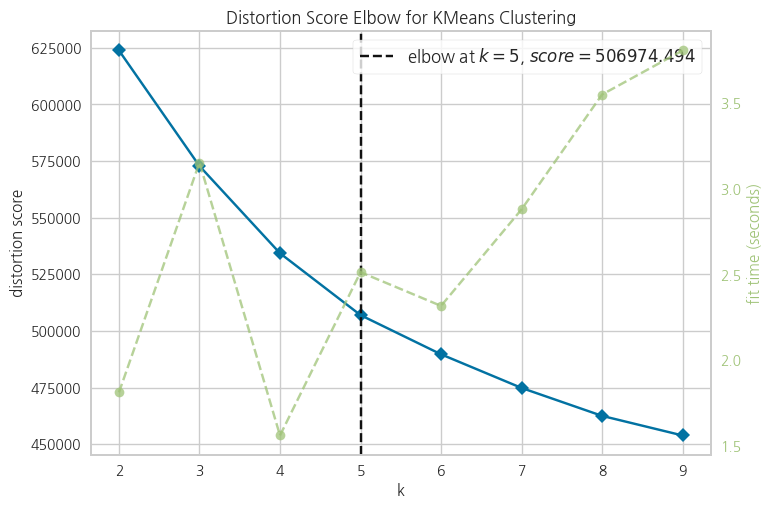

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=42), k=(2, 10))

In [ ]:
kelbow_visualizer(KMeans(random_state=42), scaled_features, k=(2,10))

#### 클러스터링

In [ ]:
# 엘보우 플롯에 따라 클러스터 그룹은 4로 설정
best_k = 5

kmeans = KMeans(n_clusters = best_k, random_state = 42)
com_df['cluster'] = kmeans.fit_predict(scaled_features)
com_df.head(2)

,고객id,Age,Child_Age_Months,Number_of_Children,Gender,Child_1_Gender,Child_2_Gender,Child_3_Gender,Parenting_Stress_Level,Child_1_Age_Months,Child_2_Age_Months,Child_3_Age_Months,Topic 1,Topic 2,Topic 3,1,2,3,4,5,6,7,8,9,10,11,cluster
0,Kkv35HMb,30,3,1,0,1,0,0,5,3,0.0,0.0,1,7,6,1,1,0,0,0,0,0,0,0,1,0,4
1,5dV7Owcf,34,42,1,0,0,0,0,5,42,0.0,0.0,0,10,4,0,0,0,0,1,0,1,0,1,0,0,3


#### 고객의 대표 구매특성

In [ ]:
cus_df.dtypes

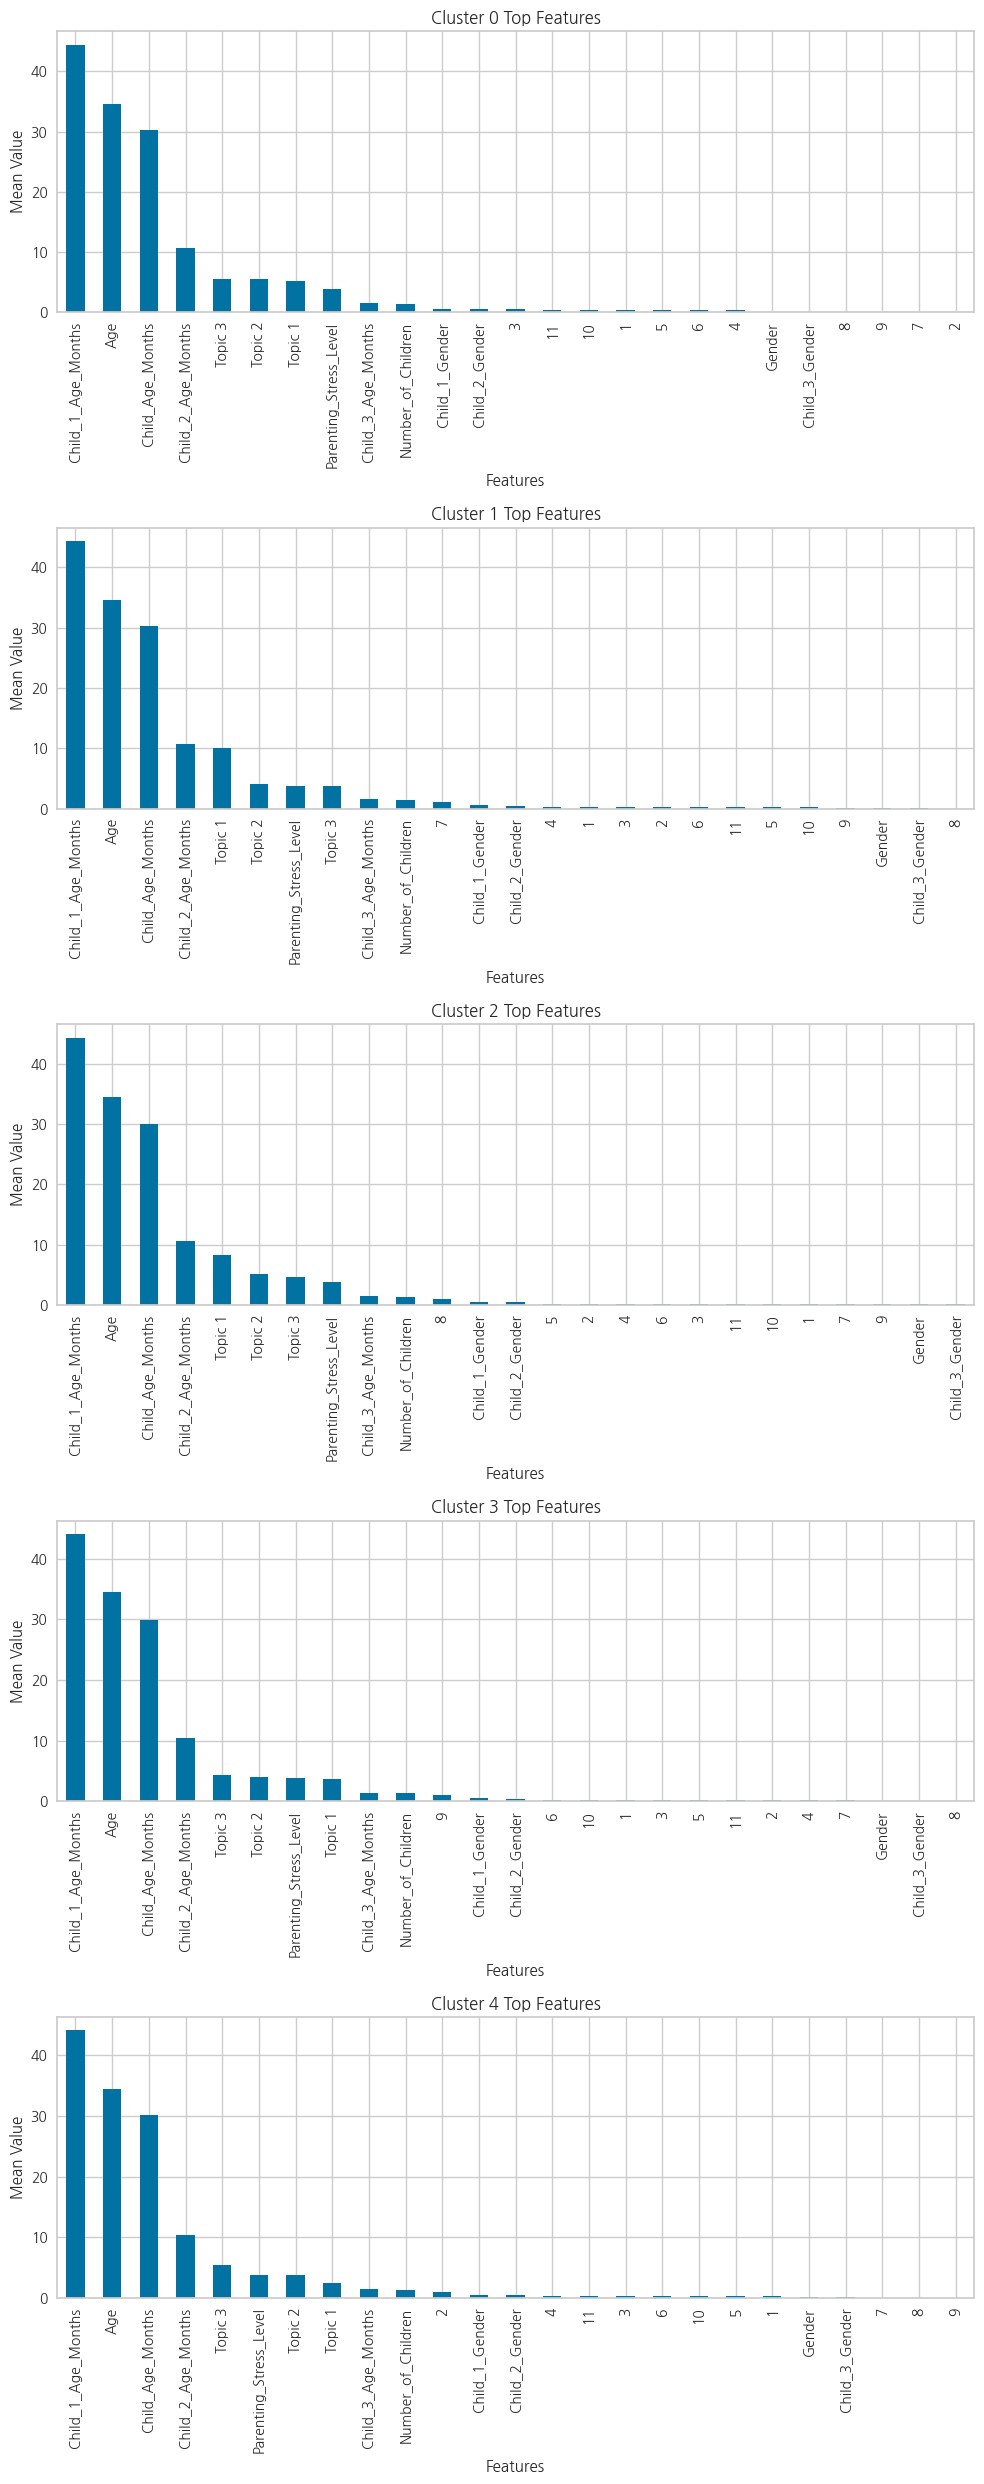

In [ ]:
for i, c in enumerate(list(com_dfcolumns[:3])):
  plt.figure(figsize=(6, 3))
  sns.boxplot(y=rfm[c], x=rfm['cluster'], order=[3,1,0,2], palette='Blues')
  plt.show()